In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Univalle_pm10.csv")

In [8]:
df.head()

,Estacion,Fecha inicial,Fecha final,PM10
0,UNIVERSIDAD DEL VALLE,2021-06-28,NaN,12.800000
1,UNIVERSIDAD DEL VALLE,2021-06-27,NaN,11.516667
2,UNIVERSIDAD DEL VALLE,2021-06-26,NaN,13.316667
3,UNIVERSIDAD DEL VALLE,2021-06-25,NaN,14.020833
4,UNIVERSIDAD DEL VALLE,2021-06-24,NaN,12.916667


In [9]:
df = pd.DataFrame(df["PM10"].values,index=df['Fecha inicial'],columns=["PM10"])
df.head()

,PM10
Fecha inicial,
2021-06-28,12.800000
2021-06-27,11.516667
2021-06-26,13.316667
2021-06-25,14.020833
2021-06-24,12.916667


<Axes: title={'center': 'Distribución de PM10'}>

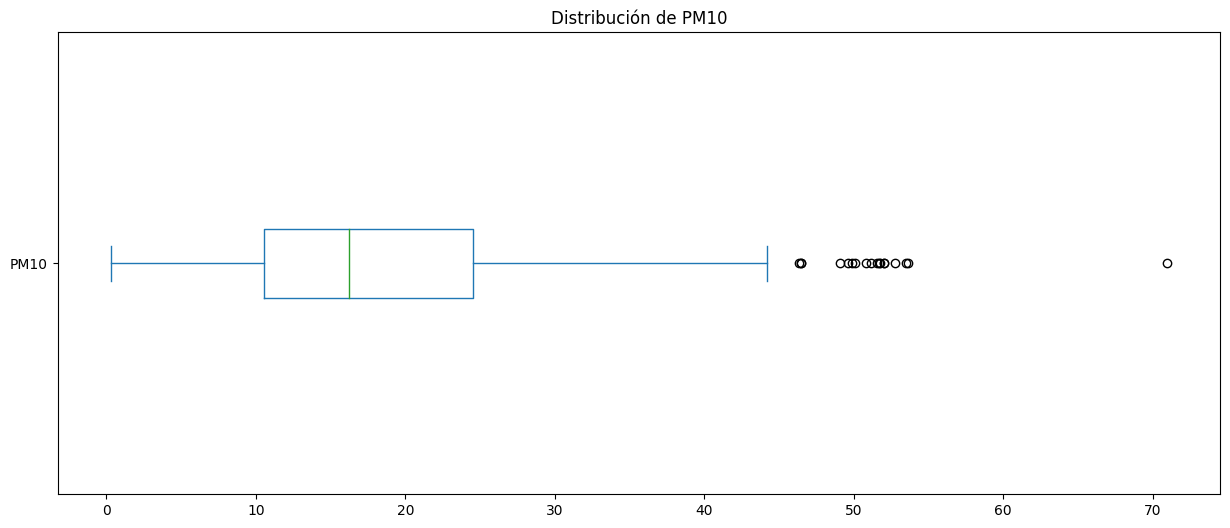

In [10]:
fig,ax = plt.subplots(figsize=(15,6))
df.PM10.plot(kind='box',vert=False,title="Distribución de PM10",ax=ax)

<Axes: title={'center': 'PM10 Time Series'}, xlabel='Time', ylabel='PM10'>

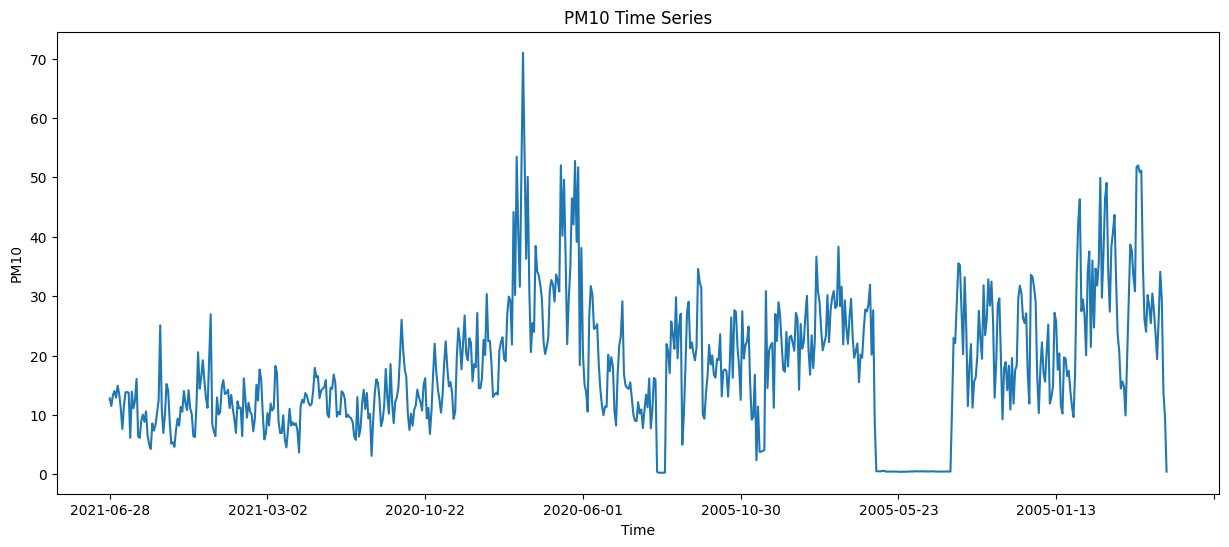

In [11]:
fig,ax = plt.subplots(figsize=(15,6))
df.PM10.plot(xlabel="Time",ylabel="PM10",title="PM10 Time Series",ax=ax)

<Axes: title={'center': 'Monthly Moving Average'}, xlabel='Fecha inicial', ylabel='PM10'>

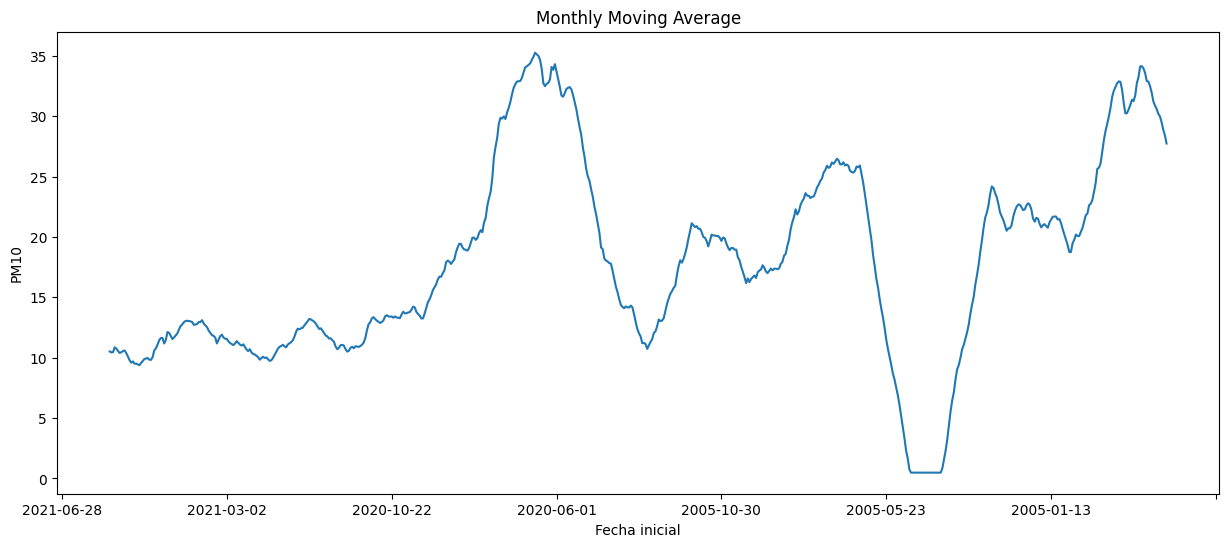

In [12]:
fig,ax= plt.subplots(figsize=(15,6))
df.PM10.rolling(30).mean().plot(ax=ax,ylabel="PM10",title="Monthly Moving Average")

<Axes: title={'center': 'Monthly Rolling Average'}, xlabel='Fecha inicial', ylabel='PM10'>

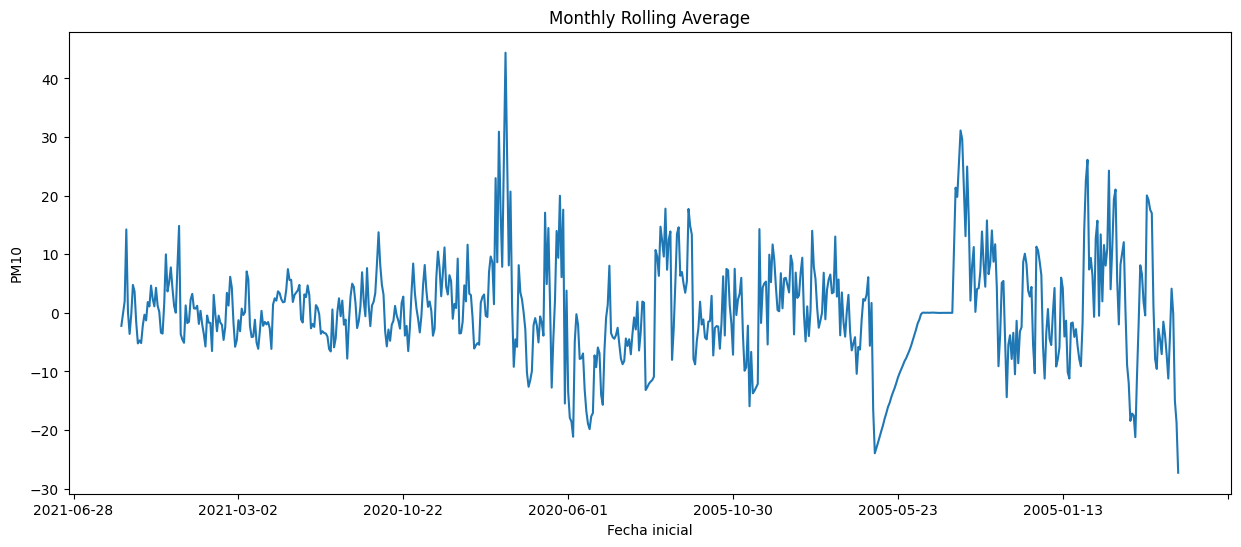

In [13]:
y_deseason = df["PM10"] - df["PM10"].rolling(30).mean()

fig,ax=plt.subplots(figsize=(15,6))
y_deseason.plot(ax=ax,ylabel="PM10",title="Monthly Rolling Average")

In [14]:
df["PM10.L1"] = df["PM10"].shift(1) #Lags the signal by one timestamp

df.dropna().head()

,PM10,PM10.L1
Fecha inicial,,
2021-06-27,11.516667,12.800000
2021-06-26,13.316667,11.516667
2021-06-25,14.020833,13.316667
2021-06-24,12.916667,14.020833
2021-06-23,14.913043,12.916667


In [15]:
df.corr()

,PM10,PM10.L1
PM10,1.000000,0.818405
PM10.L1,0.818405,1.000000


Text(0.5, 1.0, 'Autocorrelación')

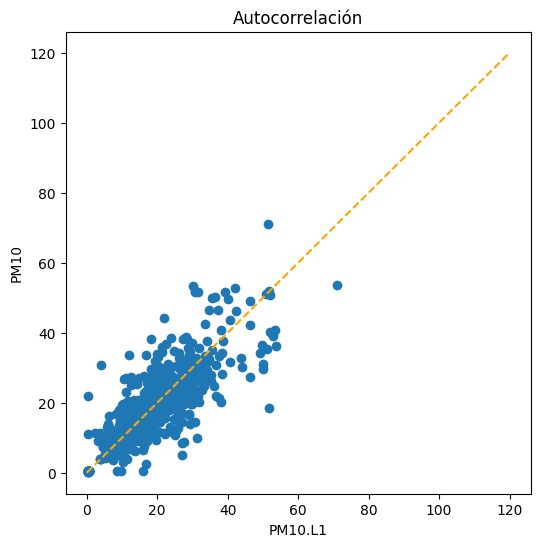

In [18]:
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(x=df["PM10.L1"],y=df["PM10"])
ax.plot([0,120],[0,120],linestyle="--",color="orange")
plt.xlabel("PM10.L1")
plt.ylabel("PM10")
plt.title("Autocorrelación")

In [20]:
df = df.dropna()
target ="PM10"
y = df[target]
X = df.drop(columns=target)

In [21]:
cutoff = int(len(X)*0.8)

In [22]:
X_train,y_train = X.iloc[:cutoff],y.iloc[:cutoff]
X_test,y_test = X.iloc[cutoff:],y.iloc[cutoff:]

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
training_mae = mean_absolute_error(y_train,model.predict(X_train))
test_mae = mean_absolute_error(y_test,model.predict(X_test))
print("Training MAE: ", round(training_mae,2))
print("Testing MAE",round(test_mae,2))

Training MAE:  4.17
Testing MAE 6.24


In [27]:
df_pred_test = pd.DataFrame({
    "y_test":y_test,
    "y_pred" : model.predict(X_test)
})

df_pred_test.head()

,y_test,y_pred
Fecha inicial,,
2005-03-17,28.605833,21.024791
2005-03-16,35.532083,26.359204
2005-03-15,35.203750,32.036881
2005-03-14,27.911250,31.767735
2005-03-13,20.225000,25.789831


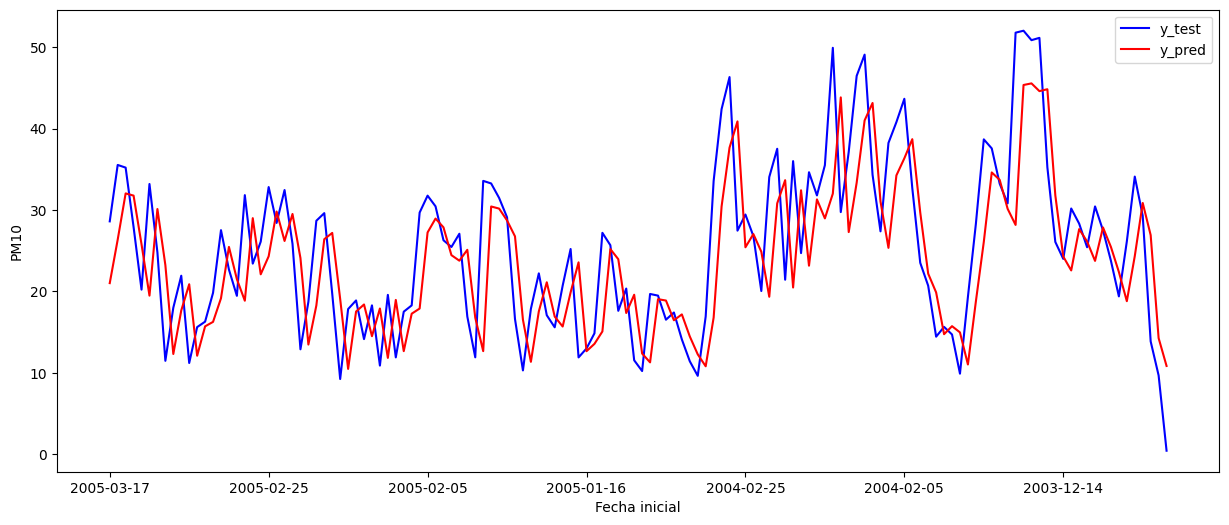

In [29]:
fig,ax = plt.subplots(figsize=(15,6))
df_pred_test.y_test.plot(ax=ax,ylabel="PM10",color="blue")
df_pred_test.y_pred.plot(ax=ax,ylabel="PM10",color="red")
plt.legend()

#Autoregresivos

Text(0, 0.5, 'Correlation coefficient')

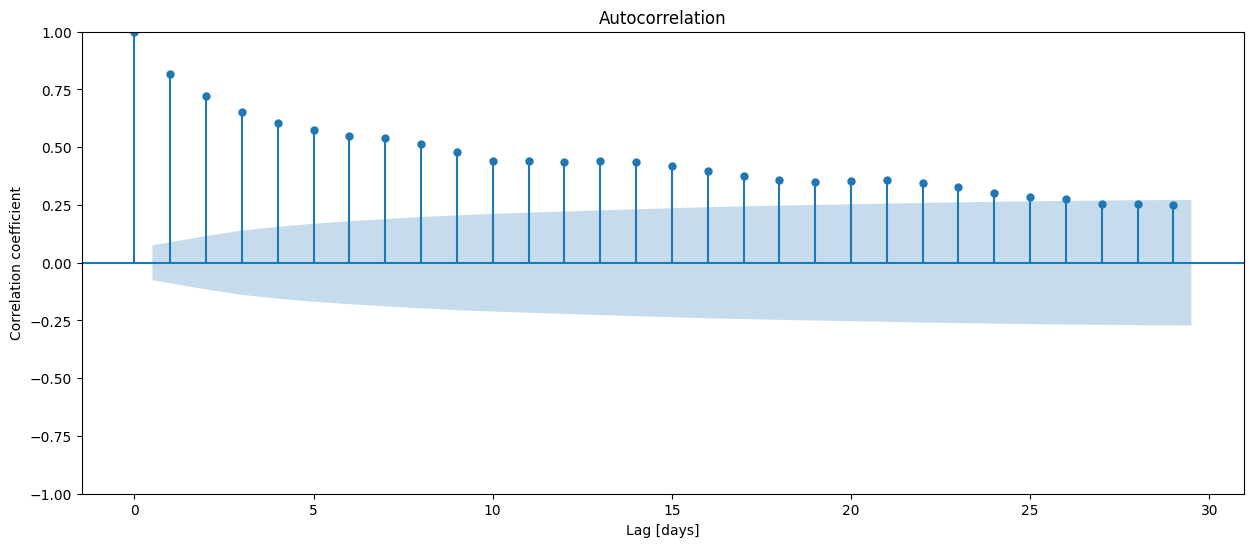

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax = plt.subplots(figsize=(15,6))
plot_acf(y,ax=ax)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation coefficient")

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'Correlation coefficient')

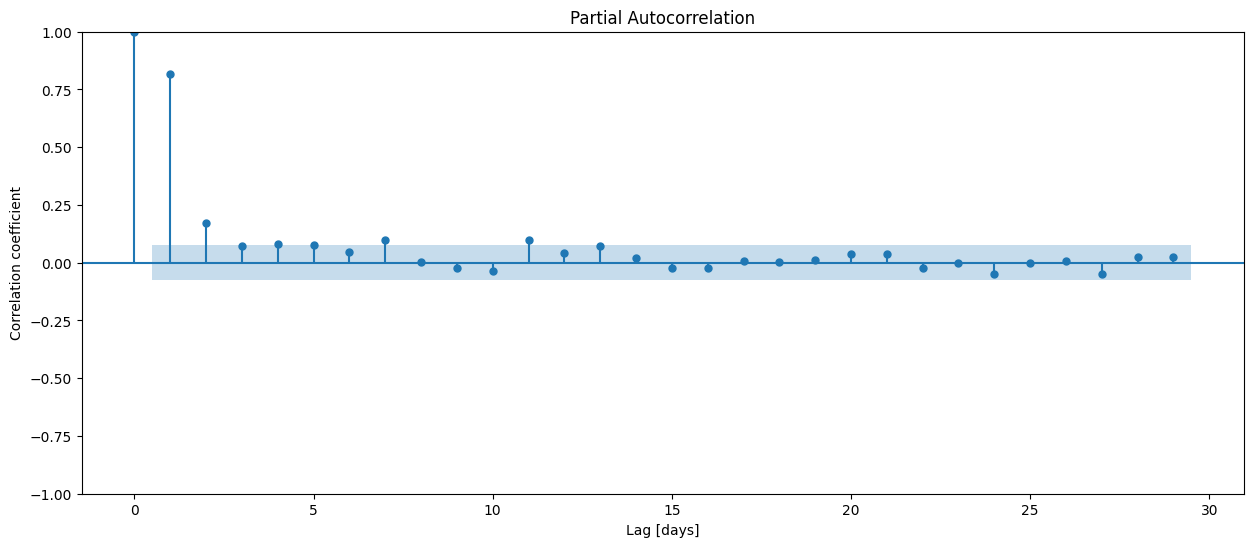

In [33]:

fig,ax = plt.subplots(figsize=(15,6))
plot_pacf(y,ax=ax)
plt.xlabel("Lag [days]")
plt.ylabel("Correlation coefficient")

In [34]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y_train,lags=2).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
